<a href="https://colab.research.google.com/github/yonghwadragon/ELS-Stepdown-Three-Stocks-Monte-Carlo/blob/main/ELS_Stepdown_Three_stocks_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELS_Stepdown_Three_stocks_MC
학번 : 20190566 \
이름 : 송용화

넘파이는 파이썬에서 고성능 수치 계산을 위한 라이브러리로, 다차원 배열과 행렬 연산을 지원하여 효율적이고 간결한 코드 작성을 가능케 합니다.

Matplotlib은 파이썬에서 데이터 시각화를 위한 라이브러리로, import matplotlib.pyplot as plt는 간편하게 그래프를 그리기 위해 사용됩니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
r = 0.05 #이자율
sigma = [0.5, 0.6, 0.7] #변동성
ns = 1000 #시뮬레이션 횟수
E = 100 #액면가
strike_price = [0.8 * E, 0.8 * E, 0.85 * E, 0.85 * E, 0.9 * E, 0.9 * E] #행사가
kib = 0.25 * E #조기상환장벽
coupon_rate = [0.05, 0.07, 0.09, 0.11, 0.13, 0.15] #쿠폰금리
repay_n = len(coupon_rate) #repay_n 변수에는 coupon_rate 리스트의 길이(6)가 할당됩니다. 이는 조기상환 일정의 횟수를 나타냅니다.
dummy = 0.15 #더미는 조기상환이 발생하지 않았을 때 지급되는 추가 상환 금액
oneyear = 360 #1년을 나타낸다
tot_date = 3 * oneyear #시뮬레이션의 총 기간 3년
dt = 1 / oneyear #시뮬레이션에서 한 단계의 시간 간격 하루

In [ ]:
S = np.zeros((tot_date + 1, 3)) #1080+1행,3열의 0행렬이 됩니다. 여기서 초기 주가를 포함하여 시뮬레이션을 진행하기 위해 tot_date + 1로 설정했습니다.
S[0, :] = 100 # 첫 번째행을 100으로 만들어 줍니다.
#주가 경로를 저장할 배열 S를 초기화하고, 초기 주가를 100으로 설정합니다.
S

array([[100., 100., 100.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       ...,
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]])

In [ ]:
face_value = 100 #액면가 (채권의 액면가치)
#조기상환을 체크하는 일자(cumsum : 누적합, ceil : 올림하여 정수로 변환, astype(int) : 넘파이배열의 원소를 정수형으로 변환 )
check_day = np.ceil(3 * oneyear * np.cumsum(np.ones(repay_n)) / repay_n).astype(int)  #array([ 180,  360,  540,  720,  900, 1080])
tot_payoff = np.zeros(repay_n) # 조기상환이 발생할 때마다 해당 조기상환에 대한 상환 금액을 누적하여 저장하기 위한 배열, array([0., 0., 0., 0., 0., 0.])
payoff = np.zeros(repay_n) #조기상환이 발생할 때마다 해당 조기상환에 대한 상환 금액을 저장하기 위한 배열, array([0., 0., 0., 0., 0., 0.])
payment = (1 + np.array(coupon_rate)) * face_value #각 조기상환 시점에서 지급되는 상환 금액이 할당, array([105., 107., 109., 111., 113., 115.])

In [ ]:
rho = [0.5, 0.5, 0.5] #rho는 상관관계 행렬을 정의하는데 사용되는 리스트로, 각각의 값은 세 가지 주가 경로 간의 상관계수를 나타냅니다.
corr = [[1, rho[0], rho[2]], [rho[0], 1, rho[1]], [rho[2], rho[1], 1]] #상관계수를 포함한 상관관계 행렬
#np.linalg.cholesky()함수는 주어진 양의 정부호 행렬에 대한 촐레스키 분해를 계산된 것이 k에 할당한 것인데 k인 하부삼각행렬과 그 전치로 분해한 것
k = np.linalg.cholesky(corr)
k

array([[1.        , 0.        , 0.        ],
       [0.5       , 0.8660254 , 0.        ],
       [0.5       , 0.28867513, 0.81649658]])

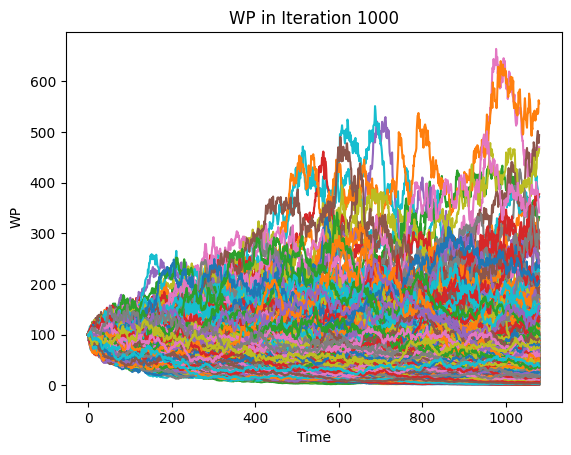

72.23404669642761


In [ ]:
for n in range(ns):   #ns 횟수만큼 반복하는 루프를 시작합니다. 이 루프는 각각의 시뮬레이션을 나타냅니다.
    repay_event = 0  #각 시뮬레이션에서 조기상환 이벤트가 발생하는지 여부를 나타내는 변수
    payoff = np.zeros(repay_n) #각 조기상환에 대한 상환 금액을 저장할 배열 payoff를 0으로 초기화합니다.
    #평균이 0이고 표준편차가 1인 표준 정규 분포에서 난수에 하부삼각행형인 k의 전치인 상부삼각행렬을 서로 곱한 것을 w(1080*3행렬)로 할당합니다.
    w = np.matmul(np.random.randn(tot_date, 3), np.transpose(k))
    A1 = (r - 0.5 * sigma[0] ** 2) * dt
    w = np.matmul(np.random.randn(tot_date, 3), np.transpose(k))
    A1 = (r - 0.5 * sigma[0] ** 2) * dt
    B1 = sigma[0] * np.sqrt(dt)
    #위에 S는 첫번째 행들이 100인 1081행 3열 이며 아래 1열에 2행부터 마지막 행까지 1080개가 있고 2행부터 마지막 행까지 누적합을 해줍니다.
    S[1:, 0] = S[0, 0] * np.exp(np.cumsum(A1 + B1 * w[:, 0]))  #이 부분이 S(ti+1)=S(ti)*e^(r-0.5*시그마제곱)*dt+시그마*루트dt*zi
    A2 = (r - 0.5 * sigma[1] ** 2) * dt
    B2 = sigma[1] * np.sqrt(dt)
    S[1:, 1] = S[0, 1] * np.exp(np.cumsum(A2 + B2 * w[:, 1]))
    A3 = (r - 0.5 * sigma[2] ** 2) * dt
    B3 = sigma[2] * np.sqrt(dt)
    S[1:, 2] = S[0, 2] * np.exp(np.cumsum(A3 + B3 * w[:, 2]))
    WP = np.min(S, 1) #S의 각 행(row)에 대한 최솟값을 계산
    plt.plot(WP)
    plt.title('WP in Iteration {}'.format(n + 1)) #Iteration 반복 횟수
    plt.xlabel('Time')
    plt.ylabel('WP')
    #plt.show()
    for i in range(repay_n): #6번
        if WP[check_day[i]] >= strike_price[i]: #WP[check_day[i]]은 array([ 180,  360,  540,  720,  900, 1080])
            payoff[i] = payment[i] #payoff[i]는 array([0., 0., 0., 0., 0., 0.]), payment[i]는 array([105., 107., 109., 111., 113., 115.])
            repay_event = 1
            break
    if repay_event == 0:
        if np.min(WP) > kib:
            payoff[-1] = (1 + dummy) * face_value  #payoff[-1]은 payoff의 마지막 원소
        else:
            payoff[-1] = (WP[-1] / 100) * face_value  #payoff[-1]은 (WP[-1] / 100) * face_value
    tot_payoff += payoff #각 시뮬레이션에서의 상환금액을 누적하는 과정
plt.show()
tot_payoff /= ns #각 시뮬레이션에서의 평균 상환금액을 계산
disc_payoff = np.zeros(repay_n) #array([0., 0., 0., 0., 0., 0.])
for j in range(repay_n): #6번 반복, #WP[check_day[i]]은 array([ 180,  360,  540,  720,  900, 1080])
    disc_payoff[j] = tot_payoff[j] * np.exp(-r * check_day[j] / oneyear)  #각 시점에서의 상환금액을 현재 가치로 환산하는 과정

price = np.sum(disc_payoff) #상환금액의 합계를 계산하여 price에 저장합니다. 이것은 금융 상품의 현재 가치를 나타냅니다.
print(price)